# Business Understanding

## Project Domain

Domain: Hotel Booking Cancellation Prediction<br>
Sub-Domain: Customer Retention & Hospitality Intelligence

Sistem prediksi pembatalan reservasi ini berada dalam ranah hospitality analytics yang memanfaatkan pendekatan data science untuk memahami perilaku pelanggan dan pola pembatalan dalam industri perhotelan. Dengan menganalisis fitur-fitur seperti lama pemesanan, tipe hotel, metode pembayaran, dan waktu kedatangan, sistem ini dapat membantu manajemen hotel mengantisipasi kemungkinan pembatalan, mengoptimalkan tingkat hunian, serta menyusun strategi retensi pelanggan yang lebih efektif dan berbasis data.

## Problem Statements

1. Tingkat pembatalan reservasi hotel yang tinggi menyebabkan kerugian finansial dan penurunan efisiensi operasional dalam industri perhotelan.

2. Pihak hotel seringkali tidak memiliki alat prediksi yang andal untuk mengidentifikasi potensi pembatalan sejak awal proses reservasi.

3. Informasi penting seperti lead time, tipe deposit, jumlah tamu, dan channel pemesanan sering kali belum dimanfaatkan secara optimal untuk mendeteksi risiko pembatalan.

4. Tidak adanya sistem berbasis data yang dapat memberikan insight real-time bagi manajemen hotel untuk mengambil tindakan preventif seperti overbooking terkontrol atau penawaran khusus.

## Goals

1. Mengembangkan model prediksi yang mampu mengidentifikasi kemungkinan pembatalan reservasi berdasarkan fitur-fitur historis pelanggan dan data pemesanan.

2. Mengurangi tingkat pembatalan dengan memberikan informasi prediktif yang dapat dimanfaatkan oleh tim manajemen hotel dalam mengambil tindakan preventif.

3. Meningkatkan efisiensi operasional hotel melalui optimalisasi alokasi kamar, overbooking terencana, dan perencanaan sumber daya.

4. Memberikan insight berbasis data kepada pemangku kepentingan (stakeholder) tentang faktor-faktor utama yang memengaruhi pembatalan.

## Solution Statements

1. Machine Learning Model
- Menggunakan model Artificial Neural Network (ANN) untuk klasifikasi pembatalan pemesanan hotel berdasarkan dataset yang berisi parameter seperti waktu pemesanan, jumlah tamu, tipe kamar, dan faktor lainnya. Model dilatih untuk memprediksi kemungkinan pembatalan dengan akurasi tinggi (>90%).

2. Aplikasi Web (Streamlit)
- Membuat antarmuka berbasis Streamlit yang mudah digunakan oleh manajemen hotel untuk memasukkan data pemesanan seperti waktu, jumlah tamu, dan tipe kamar, serta mendapatkan rekomendasi pembatalan instan dan prediksi risiko pembatalan pemesanan.

3. Optimasi dengan TensorFlow Lite
- Mengonversi model yang telah dibangun ke format TensorFlow Lite (TFLite) agar lebih ringan dan dapat dijalankan di perangkat dengan sumber daya terbatas, seperti aplikasi mobile atau perangkat lain yang digunakan oleh manajemen hotel untuk memprediksi pembatalan secara real-time.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadsalahudin5","key":"02023ae46d4bd1318e63c49d968e299e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download arezaei81/hotel-bookingcvs

Dataset URL: https://www.kaggle.com/datasets/arezaei81/hotel-bookingcvs
License(s): unknown


In [4]:
!mkdir hotel-bookingcvs
!unzip hotel-bookingcvs.zip -d hotel-bookingcvs
!ls hotel-bookingcvs

Archive:  hotel-bookingcvs.zip
  inflating: hotel-bookingcvs/hotel_booking.csv  
hotel_booking.csv


## Import Library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

## Exploratory Data Analysis

In [3]:
df = pd.read_csv('/content/hotel-bookingcvs.zip')

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [11]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


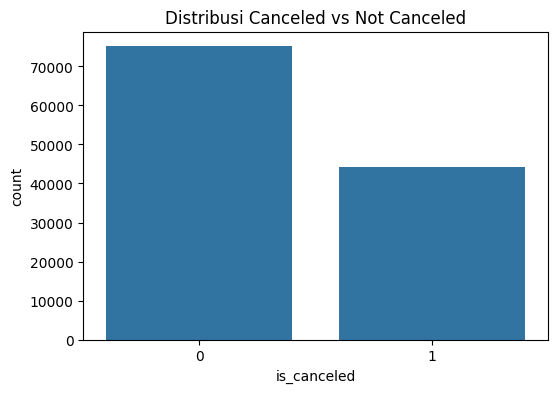

In [12]:
# Visualisasi distribusi target (is_canceled)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=df)
plt.title('Distribusi Canceled vs Not Canceled')
plt.show()

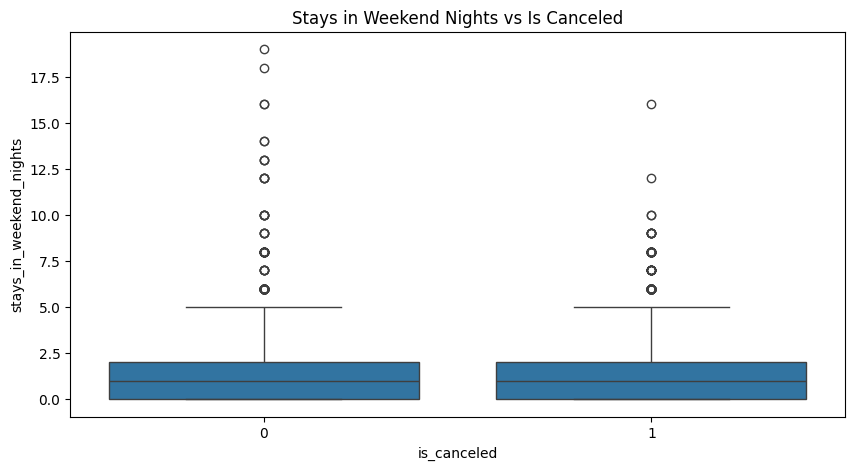

In [13]:
# Boxplot lama tinggal vs cancel
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_canceled', y='stays_in_weekend_nights', data=df)
plt.title('Stays in Weekend Nights vs Is Canceled')
plt.show()

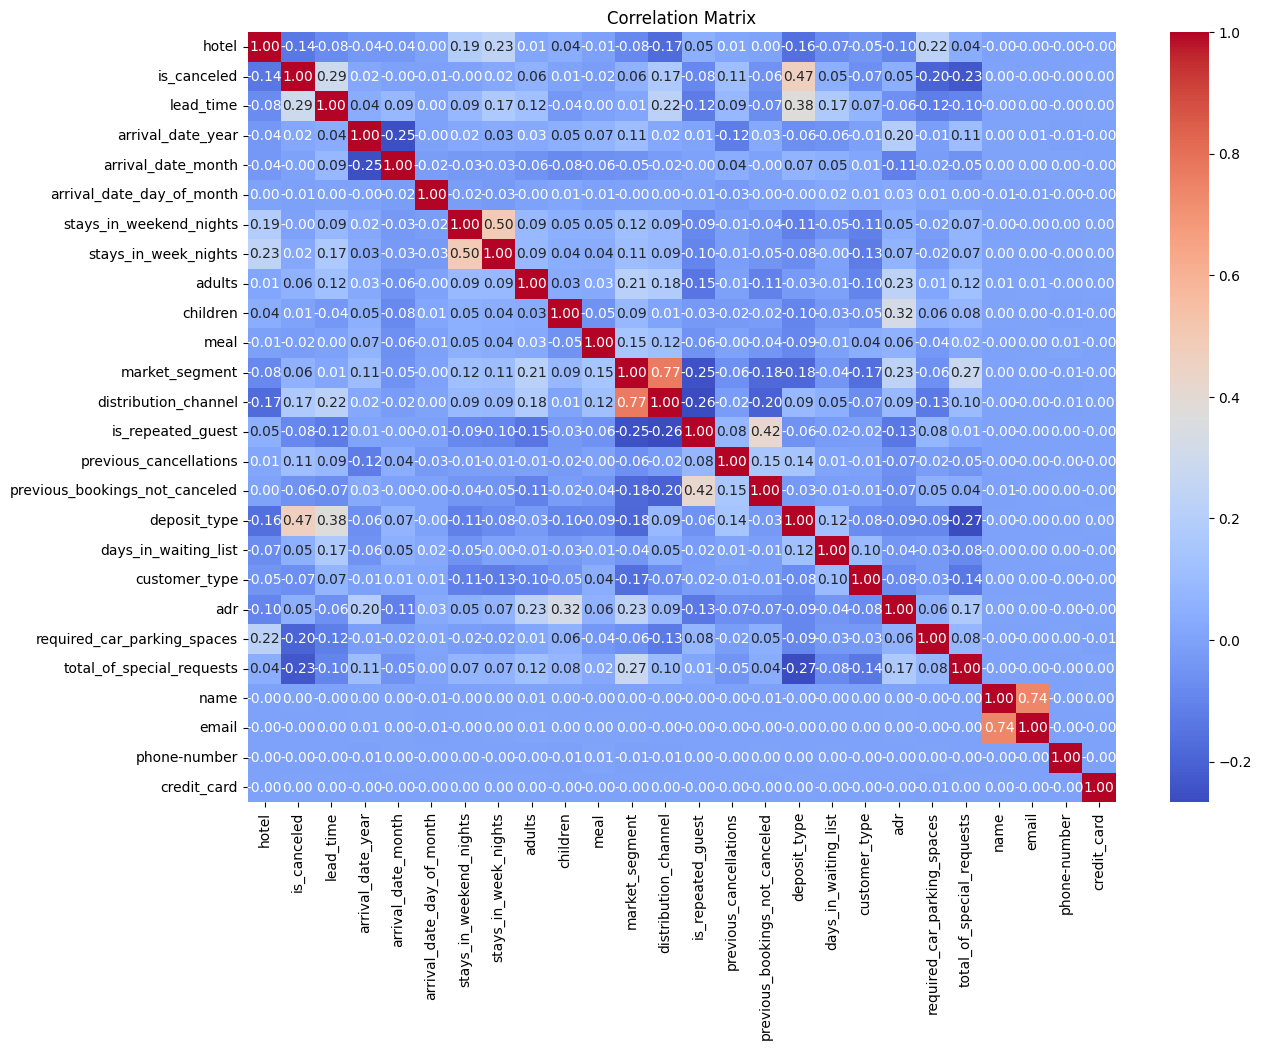

In [22]:
# Heatmap korelasi numerik
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

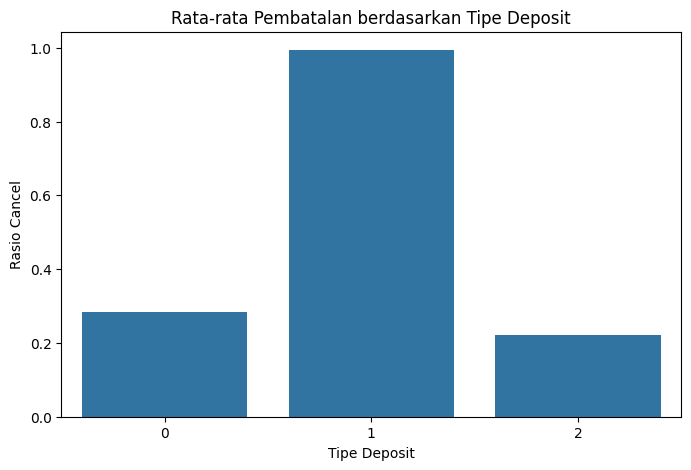

In [23]:
plt.figure(figsize=(8, 5))
cancel_ratio = df.groupby('deposit_type')['is_canceled'].mean().reset_index()
sns.barplot(x='deposit_type', y='is_canceled', data=cancel_ratio)
plt.title('Rata-rata Pembatalan berdasarkan Tipe Deposit')
plt.ylabel('Rasio Cancel')
plt.xlabel('Tipe Deposit')
plt.show()

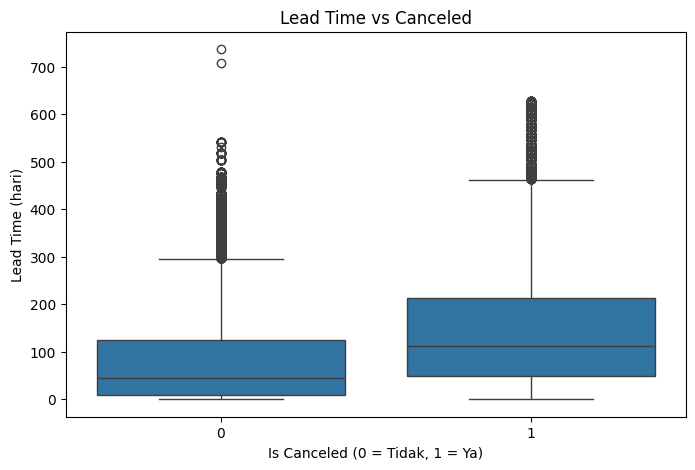

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Canceled')
plt.xlabel('Is Canceled (0 = Tidak, 1 = Ya)')
plt.ylabel('Lead Time (hari)')
plt.show()

# Data Preparation

In [4]:
# Drop kolom yang tidak relevan atau terlalu kompleks untuk sekarang
df = df.drop(columns=[
    'reservation_status_date',
    'reservation_status',
    'agent',
    'company',
    'assigned_room_type',
    'reserved_room_type',
    'booking_changes',
    'babies',
    'country',
    'arrival_date_week_number'
])

In [5]:
# Drop baris yang memiliki nilai kosong
df = df.dropna()

In [6]:
# Label Encoding untuk kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [7]:
# Definisikan fitur dan target
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [8]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Modeling

In [10]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Output biner
])

In [11]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7648 - loss: 0.4919 - val_accuracy: 0.7973 - val_loss: 0.4404
Epoch 2/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7954 - loss: 0.4317 - val_accuracy: 0.8017 - val_loss: 0.4140
Epoch 3/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8076 - loss: 0.4123 - val_accuracy: 0.8065 - val_loss: 0.4117
Epoch 4/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8099 - loss: 0.4025 - val_accuracy: 0.8088 - val_loss: 0.4034
Epoch 5/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8153 - loss: 0.3939 - val_accuracy: 0.8102 - val_loss: 0.3940
Epoch 6/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8154 - loss: 0.3925 - val_accuracy: 0.8158 - val_loss: 0.3878
Epoch 7/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8180 - loss: 0.3888 - val_accuracy: 0.8150 - val_loss: 0.3872
Epoch 8/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8190 - loss: 0.3878

# Evaluation

In [14]:
# Evaluasi
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi: {acc:.4f}")
print(f"Loss: {loss:.4f}")

747/747 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8281 - loss: 0.3828
Akurasi: 0.8283
Loss: 0.3829


In [15]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

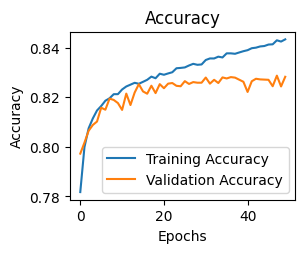

In [16]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

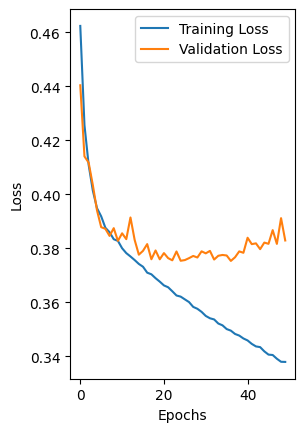

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

747/747 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


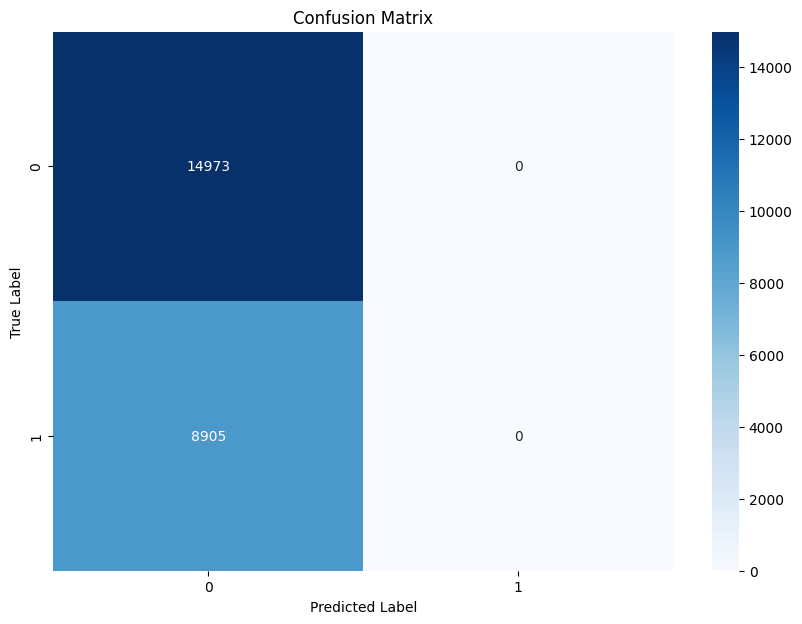

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     14973
           1       0.00      0.00      0.00      8905

    accuracy                           0.63     23878
   macro avg       0.31      0.50      0.39     23878
weighted avg       0.39      0.63      0.48     23878



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [20]:
"""## Model Simulation"""

sample_input = np.array([[0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
                          3, 3, 2, 2, 0, 0, 0.0, 0, 2, 0,
                          0, 0, 0, 1, 0]])

sample_input_df = pd.DataFrame(sample_input, columns=X.columns)

# Scaling input
sample_input_scaled = scaler.transform(sample_input_df)

# Prediksi
prediction = model.predict(sample_input_scaled)
predicted_class = (prediction > 0.5).astype(int)[0][0]

# Tampilkan hasil prediksi
print("=== Simulasi Model ===")
print("Predicted: Customer will {}".format("CANCEL" if predicted_class == 1 else "NOT CANCEL"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
=== Simulasi Model ===
Predicted: Customer will NOT CANCEL


## Save Model

In [25]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('hotel_cancel_pred.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpnv1d2dj3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 25), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134747985332176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134748022701904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134747985333328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134747985333712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134747985333136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134747985331600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134747985334288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134747985333904: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [26]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']